# Feature Selection And Classification

## Import Data

In [137]:
import pandas as pd
import numpy as np
# from bokeh import 

%matplotlib notebook 

In [138]:
data = pd.read_csv('/Users/steliosrammos/Documents/Education/Maastricht/DKE-Year3/Bachelor Thesis/data/v2/data_merged_2018.csv', sep=';')

In [146]:
data.describe()
data = data.fillna(data.mean().apply(lambda x: math.floor(x)))
data.describe()
data.to_csv('data_merged_2.csv', sep=",")
data.head()

,uuid,Act_Raw_Score,ActieveCopingPercentage,ActieveCopingScore,Age,AlgIntakeOpleidingsniveauScore_Raw,AlgIntakeWoonsituatieScore_Raw,AlgemeneGezondheidsbelevingScore,Average,BewegingsangstScore,...,TotaalLevel,TotaalScore,TransformerenScore,Ver_Raw_Score,VerminderingVanEisen,VitaliteitScore,educationLevel,livingConditions,got_go,finished_treatment
0,-9214014786609792531,16.0,38.89,26.0,44.0,1.0,4.0,70.0,39.0,27.0,...,1,6.0,9.0,15.0,4.0,80.0,20.0,20.0,1,1.0
1,-9204323589684605317,14.0,47.22,29.0,40.0,6.0,1.0,25.0,31.0,40.0,...,1,5.0,11.0,16.0,7.0,35.0,42.0,10.0,1,1.0
2,-9189315961929324040,18.0,61.11,34.0,30.0,5.0,2.0,75.0,48.0,39.0,...,2,4.0,14.0,20.0,6.0,70.0,41.0,30.0,1,0.0
3,-9187839909081422277,18.0,72.22,38.0,48.0,9.0,4.0,55.0,50.0,37.0,...,2,5.0,14.0,20.0,7.0,60.0,43.0,20.0,0,0.0
4,-9184078185923068786,16.0,55.56,32.0,69.0,3.0,3.0,30.0,79.0,51.0,...,2,9.0,11.0,19.0,8.0,55.0,32.0,40.0,1,0.0


In [153]:
data_v2 = pd.read_csv('/Users/steliosrammos/Documents/Education/Maastricht/DKE-Year3/Bachelor Thesis/Notebooks/Data Pre-Processing V2/data_merged_2.csv', sep=',')
data_v2.head()

FileNotFoundError: File b'/Users/steliosrammos/Documents/Education/Maastricht/DKE-Year3/Bachelor Thesis/Notebooks/Data Pre-Processing V2/data_merged_2.csv' does not exist

In [119]:
X = data.iloc[:,1:-2]
s = data.iloc[:,-2]
y= data.iloc[:,-1]

In [127]:
X = X.fillna(X.mean().apply(lambda x: math.floor(x)))
X = X.astype(np.float64)
X.describe()

,Act_Raw_Score,ActieveCopingPercentage,ActieveCopingScore,Age,AlgIntakeOpleidingsniveauScore_Raw,AlgIntakeWoonsituatieScore_Raw,AlgemeneGezondheidsbelevingScore,Average,BewegingsangstScore,Bsi_Age,...,SociaalFunctionerenScore,SubuitslagScore,Terugtrekken,TotaalLevel,TotaalScore,TransformerenScore,Ver_Raw_Score,VerminderingVanEisen,VitaliteitScore,educationLevel
count,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,...,2376.00000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000
mean,17.650673,44.314373,27.948232,48.234428,4.874158,3.948653,45.911195,46.194865,39.097222,48.235269,...,49.11553,2.535774,13.988215,1.475589,8.004630,8.789141,16.582071,6.805976,40.374579,38.799242
std,3.786628,13.244941,4.768698,14.487983,2.175594,10.818069,19.143252,19.505257,7.889888,14.487127,...,25.55849,1.456305,3.866383,0.499509,8.165936,2.513740,3.270409,1.888643,18.444416,11.292498
min,7.000000,0.000000,12.000000,18.000000,1.000000,0.000000,0.000000,0.000000,17.000000,18.000000,...,0.00000,0.000000,7.000000,1.000000,0.000000,4.000000,8.000000,3.000000,0.000000,20.000000
25%,15.000000,36.110000,25.000000,37.000000,3.000000,2.000000,30.000000,33.000000,33.000000,37.000000,...,25.00000,1.000000,11.000000,1.000000,4.000000,7.000000,14.000000,6.000000,30.000000,32.000000
50%,18.000000,44.440000,28.000000,49.000000,5.000000,3.000000,45.000000,46.000000,39.000000,49.000000,...,50.00000,3.000000,14.000000,1.000000,6.000000,9.000000,16.000000,7.000000,40.000000,41.000000
75%,20.000000,52.780000,31.000000,59.000000,7.000000,4.000000,60.000000,59.000000,44.250000,59.000000,...,62.50000,4.000000,16.000000,2.000000,8.000000,10.000000,19.000000,8.000000,50.000000,43.000000
max,28.000000,88.890000,44.000000,89.000000,10.000000,99.000000,100.000000,99.000000,66.000000,89.000000,...,100.00000,5.000000,28.000000,2.000000,52.000000,16.000000,29.000000,12.000000,100.000000,70.000000


In [129]:
data.columns

# data_2 = pd.DataFrame([X,y], columns=data.columns)

# data_2 = data.drop('uuid',axis=1)
# data_2.describe()

data_2.to_csv('data_merged_2.csv', sep=";")

Index(['Act_Raw_Score', 'ActieveCopingPercentage', 'ActieveCopingScore', 'Age',
       'AlgIntakeOpleidingsniveauScore_Raw', 'AlgIntakeWoonsituatieScore_Raw',
       'AlgemeneGezondheidsbelevingScore', 'Average', 'BewegingsangstScore',
       'Bsi_Age', 'Bsi_Ang_Raw_Score', 'Bsi_Cog_Raw_Score',
       'Bsi_Dep_Raw_Score', 'Bsi_Fob_Raw_Score', 'Bsi_Hos_Raw_Score',
       'Bsi_Int_Raw_Score', 'Bsi_Itm_Raw_Score', 'Bsi_Par_Raw_Score',
       'Bsi_Psy_Raw_Score', 'Bsi_Som_Raw_Score', 'Bsi_Tot_Raw_Score',
       'Catastroferen', 'Exp_Raw_Score', 'FysiekFunctionerenScore',
       'GemiddeldScore', 'Ger_Raw_Score', 'GezondheidsveranderingScore',
       'HulpeloosheidLevel', 'HulpeloosheidScore', 'MagnificatieLevel',
       'MagnificatieScore', 'MentaleGezondheidScore', 'OQ452_ASD_Raw_Score',
       'OQ452_IR_Raw_Score', 'OQ452_SD_Raw_Score', 'OQ452_SR_Raw_Score',
       'OQ452_TOT_Raw_Score', 'OntspannenScore', 'PDI_BeperkingScore',
       'Pal_Raw_Score', 'Pas_Raw_Score', 'PassieveCopingPerc

## Pipeline: Recursive Feature Elimination with Cross Validation

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from yellowbrick.features import RFECV
from sklearn.ensemble import RandomForestClassifier

In [79]:
# As descrbied here: https://ramhiser.com/post/2018-03-25-feature-selection-with-scikit-learn-pipeline/

class PipelineRFE(Pipeline):

    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.feature_importances_ = self.named_steps['RFC'].feature_importances_
        return self

# Perform Feature Selection
pipeline = [
    ('scaler', StandardScaler()),
    ('RFC', RandomForestClassifier(n_jobs=-1, class_weight="balanced", n_estimators=150))
]

<IPython.core.display.Javascript object>


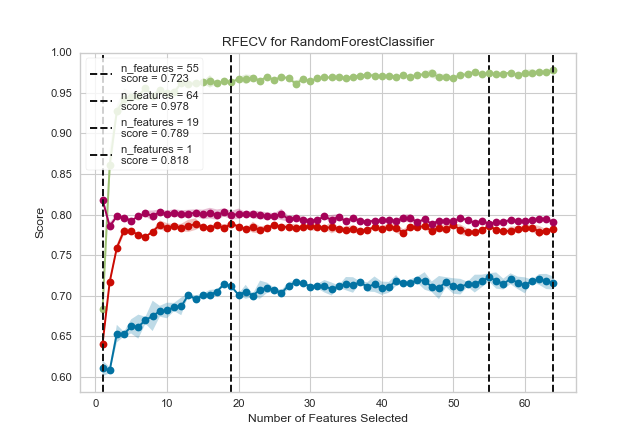

In [35]:
# Stratified cross validation for class imbalance
cv = StratifiedKFold(2)

estimator = PipelineRFE(pipeline)
clf = RFECV(estimator, step=5, cv=cv, scoring="roc_auc")
clf.fit(X, s)
clf.finalize()

clf_recall = RFECV(estimator, step=5, cv=cv, scoring="recall")
clf_recall.fit(X, s)
clf_recall.finalize()

clf_accuracy = RFECV(estimator, step=5, cv=cv, scoring="accuracy")
clf_accuracy.fit(X, s)
clf_accuracy.finalize()

clf_precision = RFECV(estimator, step=5, cv=cv, scoring="precision")
clf_precision.fit(X, s)
clf_precision.finalize()

In [39]:
# Remove the non-optimal features 
mask = clf_accuracy.support_
X_reduced = X.iloc[:, mask]
X_reduced.head()

,ActieveCopingScore,Age,Average,BewegingsangstScore,Bsi_Age,Bsi_Dep_Raw_Score,Bsi_Som_Raw_Score,Bsi_Tot_Raw_Score,FysiekFunctionerenScore,MentaleGezondheidScore,OQ452_ASD_Raw_Score,OQ452_IR_Raw_Score,OQ452_SD_Raw_Score,OQ452_SR_Raw_Score,OQ452_TOT_Raw_Score,PDI_BeperkingScore,PassieveCopingPercentage,QBPDS_BeperkingScore,VitaliteitScore
0,26.0,44.0,39.0,27.0,44.0,0.0,0.0,12.0,35.0,76.0,7.0,8.0,18.0,7.0,33.0,39.0,34.92,38.0,80.0
1,29.0,40.0,31.0,40.0,40.0,10.0,11.0,67.0,60.0,48.0,23.0,19.0,50.0,14.0,83.0,30.0,50.79,39.0,35.0
2,34.0,30.0,48.0,39.0,30.0,6.0,6.0,51.0,80.0,72.0,16.0,13.0,36.0,15.0,64.0,13.0,34.92,35.0,70.0
3,38.0,48.0,50.0,37.0,48.0,7.0,12.0,91.0,30.0,84.0,11.0,13.0,21.0,8.0,42.0,33.0,57.14,58.0,60.0
4,32.0,69.0,79.0,51.0,69.0,2.0,6.0,21.0,85.0,44.0,25.0,2.0,33.0,6.0,41.0,38.0,42.86,72.0,55.0


In [41]:
from sklearn.externals import joblib

rfe_best_estimator = clf_accuracy.rfe_estimator_

filename = 'rfe_best_estimator.sav'
joblib.dump(rfe_best_estimator, filename)

['rfe_best_estimator.sav']

## Classify

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, average_precision_score, recall_score

In [69]:
def find_best_params_rfc(X_train, X_test, s_train, s_test):

    # Parameters for the grid search 
    parameters = {
        'n_jobs': [-1],
        'n_estimators':[100, 150,200],
        'class_weight':['balanced'],
    #     'RFC__':[],
    }

    RFC = RandomForestClassifier()
    grid = GridSearchCV(RFC, param_grid=parameters, cv=StratifiedKFold(5), scoring="roc_auc",verbose=0)
    grid.fit(X_train, s_train)
    
    predicted_s = grid.predict(X_test)
    
    print(
        'Best parameters: {}'.format(grid.best_params_),
        'Accuracy {}'.format(accuracy_score(s_test, predicted_s)),
        'Precision {}'.format(precision_score(s_test, predicted_s)),
        'ROC {}'.format(roc_auc_score(s_test, predicted_s)),
        'Average precision-recall score: {0:0.2f}'.format(average_precision_score(s_test, predicted_s))
    )
    
    return grid

In [80]:
def classify(classifier, X_train, proba = False):
    
    if proba:
        predicted = classifier.predict_proba(X_train)
    else:
        predicted= classifier.predict(X_train)
    
    return predicted

###  Classifier S 

In [62]:
X_train, X_test, s_train, s_test = train_test_split(X_reduced, s, test_size=0.4, stratify=s)

In [70]:
best_clf = find_best_params_rfc(X_train, X_test, s_train, s_test)

Best parameters: {'class_weight': 'balanced', 'n_estimators': 100, 'n_jobs': -1} Accuracy 0.7896950578338591 Precision 0.8045454545454546 ROC 0.5809782608695653 Average precision-recall score: 0.80


In [111]:
# Find the best cut-off value to optimize ROC AUC score:

predicted_proba_s = classify(best_clf, X_test, True)

roc_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []

cutoffs = range(1, 10, 1)

for cutoff in cutoffs:
    predicted_s = (predicted_proba_s[:,1] >= (cutoff/10)).astype(int)
    
    # Calculate scores
    roc_scores.append(roc_auc_score(s_test, predicted_s))
    accuracy_scores.append(accuracy_score(s_test, predicted_s))
    precision_scores.append(precision_score(s_test, predicted_s))
    recall_scores.append(recall_score(s_test, predicted_s))

In [113]:
from bokeh.plotting import figure, output_notebook, show

output_notebook()

p = figure()
p.line(cutoffs, roc_scores)
p.line(cutoffs, accuracy_scores,  color="purple")
p.line(cutoffs, precision_scores,  color="red")
p.line(cutoffs, recall_scores,  color="green")
# p.axis.x_axis_label('Cutof f value')

show(p)

Loading BokehJS ...